# Simple regression- Delivery time problem

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("D:\DS Assignments\Assignment 4\delivery_time.csv")

In [3]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
#Rename column names as sorting time= X and Delivery time = Y
data = data.rename(columns={'Sorting Time': 'X', 'Delivery Time': 'Y'})

In [5]:
data.head()

,Y,X
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
data.corr()

,Y,X
Y,1.000000,0.825997
X,0.825997,1.000000


C:\Users\91931\AppData\Local\Temp\ipykernel_1068\3638293720.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['X'])


<Axes: xlabel='X', ylabel='Density'>

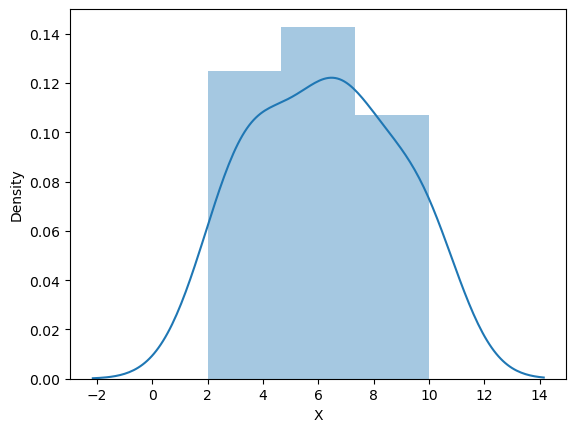

In [7]:
import seaborn as sns
sns.distplot(data['X'])

C:\Users\91931\AppData\Local\Temp\ipykernel_1068\2740884709.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Y'])


<Axes: xlabel='Y', ylabel='Density'>

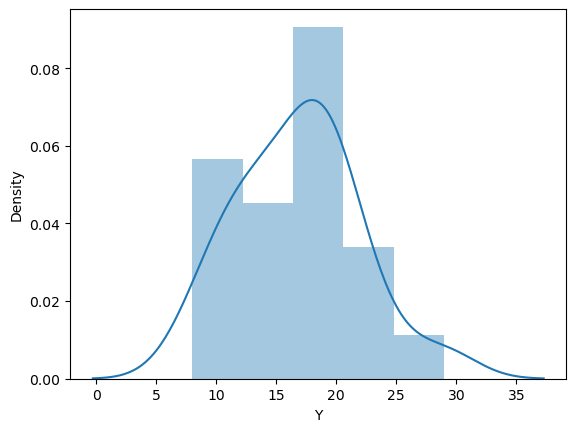

In [8]:
sns.distplot(data['Y'])

# regression model

In [11]:
import statsmodels.formula.api as smf
model = smf.ols("Y ~ X", data=data).fit()

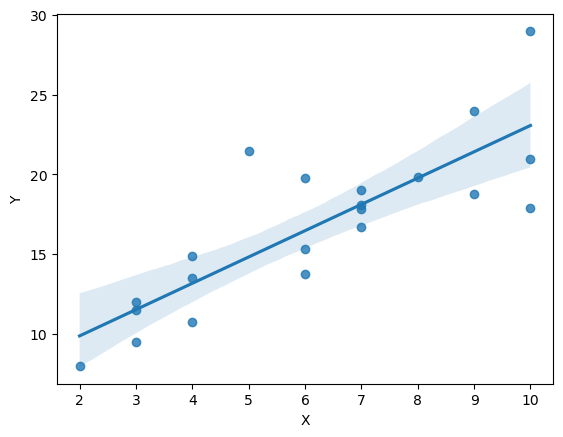

In [12]:
sns.regplot(x="X", y="Y", data=data);

In [13]:
#coefficients
model.params

Intercept    6.582734
X            1.649020
dtype: float64

In [14]:
#t and p values
print(model.tvalues, '\n', model.pvalues)

Intercept    3.823349
X            6.387447
dtype: float64 
 Intercept    0.001147
X            0.000004
dtype: float64


In [15]:
# R squared values 
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Let's try other transformations to check for better fitting model

In [17]:
#log transformation
import numpy as np
data['log_X'] = np.log(data['X'])
import numpy as np
data['log_Y'] = np.log(data['Y'])

In [18]:
data.head()

,Y,X,log_X,log_Y
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296


C:\Users\91931\AppData\Local\Temp\ipykernel_1068\1767558509.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['log_X'])


<Axes: xlabel='log_X', ylabel='Density'>

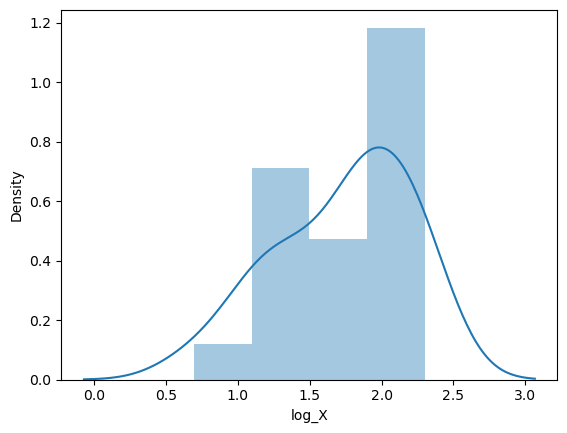

In [19]:
sns.distplot(data['log_X'])

C:\Users\91931\AppData\Local\Temp\ipykernel_1068\2594288202.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['log_Y'])


<Axes: xlabel='log_Y', ylabel='Density'>

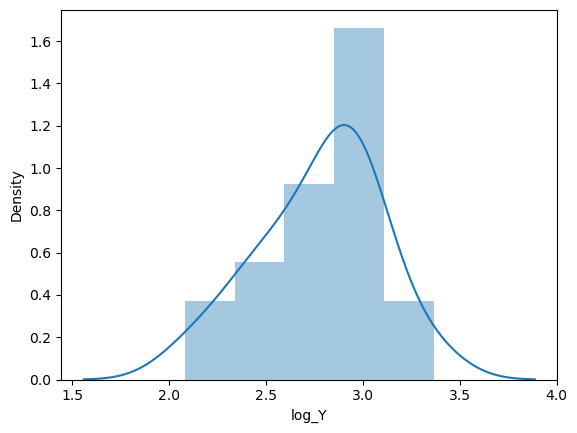

In [20]:
sns.distplot(data['log_Y'])

In [21]:
#square root transformation
data['sqrt_X'] = np.sqrt(data['X'])
data['sqrt_Y'] = np.sqrt(data['Y'])


In [22]:
data.head()

,Y,X,log_X,log_Y,sqrt_X,sqrt_Y
0,21.00,10,2.302585,3.044522,3.162278,4.582576
1,13.50,4,1.386294,2.602690,2.000000,3.674235
2,19.75,6,1.791759,2.983153,2.449490,4.444097
3,24.00,9,2.197225,3.178054,3.000000,4.898979
4,29.00,10,2.302585,3.367296,3.162278,5.385165


In [24]:
#cube root transformation
data['cbrt_X'] = np.cbrt(data['X'])
data['cbrt_Y'] = np.cbrt(data['Y'])

In [25]:
data.head()

,Y,X,log_X,log_Y,sqrt_X,sqrt_Y,cbrt_X,cbrt_Y
0,21.00,10,2.302585,3.044522,3.162278,4.582576,2.154435,2.758924
1,13.50,4,1.386294,2.602690,2.000000,3.674235,1.587401,2.381102
2,19.75,6,1.791759,2.983153,2.449490,4.444097,1.817121,2.703060
3,24.00,9,2.197225,3.178054,3.000000,4.898979,2.080084,2.884499
4,29.00,10,2.302585,3.367296,3.162278,5.385165,2.154435,3.072317


In [26]:
model_log = smf.ols("log_Y ~ log_X", data=data).fit()

In [27]:
# R squared values 
(model_log.rsquared, model_log.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [30]:
model_sqrt = smf.ols("sqrt_Y ~ sqrt_X", data=data).fit()

In [31]:
(model_sqrt.rsquared, model_sqrt.rsquared_adj)

(0.7292011987544664, 0.7149486302678594)

In [32]:
model_cbrt = smf.ols("cbrt_Y ~ cbrt_X", data=data).fit()

In [33]:
(model_cbrt.rsquared, model_cbrt.rsquared_adj)

(0.744116757756627, 0.7306492186911864)

# MinMaxScalar and StandardScaler

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [36]:
cols_to_normalize = ['X', 'Y']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# transform the data
data[['X_norm', 'Y_norm']] = scaler.fit_transform(data[cols_to_normalize])

In [37]:
data.head()

,Y,X,log_X,log_Y,sqrt_X,sqrt_Y,cbrt_X,cbrt_Y,X_norm,Y_norm
0,21.00,10,2.302585,3.044522,3.162278,4.582576,2.154435,2.758924,1.000,0.619048
1,13.50,4,1.386294,2.602690,2.000000,3.674235,1.587401,2.381102,0.250,0.261905
2,19.75,6,1.791759,2.983153,2.449490,4.444097,1.817121,2.703060,0.500,0.559524
3,24.00,9,2.197225,3.178054,3.000000,4.898979,2.080084,2.884499,0.875,0.761905
4,29.00,10,2.302585,3.367296,3.162278,5.385165,2.154435,3.072317,1.000,1.000000


In [40]:
# Create a MinMaxScaler object
scaler = StandardScaler()

# transform the data
data[['X_standardized', 'Y_standardized']] = scaler.fit_transform(data[cols_to_normalize])

In [41]:
data.head()

,Y,X,log_X,log_Y,sqrt_X,sqrt_Y,cbrt_X,cbrt_Y,X_norm,Y_norm,X_standardized,Y_standardized
0,21.00,10,2.302585,3.044522,3.162278,4.582576,2.154435,2.758924,1.000,0.619048,1.535625,0.849867
1,13.50,4,1.386294,2.602690,2.000000,3.674235,1.587401,2.381102,0.250,0.261905,-0.882984,-0.664490
2,19.75,6,1.791759,2.983153,2.449490,4.444097,1.817121,2.703060,0.500,0.559524,-0.076781,0.597474
3,24.00,9,2.197225,3.178054,3.000000,4.898979,2.080084,2.884499,0.875,0.761905,1.132523,1.455610
4,29.00,10,2.302585,3.367296,3.162278,5.385165,2.154435,3.072317,1.000,1.000000,1.535625,2.465181


In [42]:
model_norm = smf.ols("Y_norm ~ X_norm", data=data).fit()

In [43]:
(model_norm.rsquared, model_norm.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [44]:
model_standardized = smf.ols("Y_standardized ~ X_standardized", data=data).fit()

In [45]:
(model_standardized.rsquared, model_standardized.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [46]:
r_squared = [model.rsquared, model_log.rsquared, model_sqrt.rsquared, model_cbrt.rsquared, model_norm.rsquared, model_standardized.rsquared]
r_squared_adj = [model.rsquared_adj, model_log.rsquared_adj, model_sqrt.rsquared_adj, model_cbrt.rsquared_adj, model_norm.rsquared_adj, model_standardized.rsquared_adj]

In [47]:
df={'Model': ['Model', 'model_log', 'model_sqrt', 'model_cbrt', 'model_norm', 'model_standardized'], 'R-squared': r_squared, 'Adj. R-squared': r_squared_adj}

In [48]:
table = pd.DataFrame(df)

In [49]:
table

,Model,R-squared,Adj. R-squared
0,Model,0.682271,0.665549
1,model_log,0.772161,0.760170
2,model_sqrt,0.729201,0.714949
3,model_cbrt,0.744117,0.730649
4,model_norm,0.682271,0.665549
5,model_standardized,0.682271,0.665549


In [50]:
# Conclusion: From above table we can see that 'the log transformation regression model' is best fitting.